In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [24]:
#importing the training dataset
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [25]:
#Trying some data Visulaization Techniques
from scipy.stats import pearsonr #Importing the Pearson Correlation Coefficient calc
print("With Fare",pearsonr(data_train["Survived"].values,data_train["Fare"].values ))
print("With Age",pearsonr(data_train["Survived"].values,data_train["Age"].values ))

With Fare (0.25730652238496243, 6.120189341921873e-15)
With Age (nan, 1.0)


C:\ANACONDA\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [10]:
#apply SelectKBest class to extract top  features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X=data_train.iloc[:,3:]
Y=data_train.iloc[:,2:3]
best_features=SelectKBest(score_func=chi2, k=3)
fit=best_features.fit(X,Y)
dfscores=pd.DataFrame(fit.scores_)
df.columns=pd.DataFrame(X.columns)

print("DFscores",dfscores)
print("DFcolumns",dfcolumns)

ValueError: could not convert string to float: 'Q'

In [26]:
#Preprocessing train data
data_train=data_train.drop(labels=["Name","Ticket","Cabin","Embarked"],axis=1)



In [27]:
#Representing Sex with numbers
gender = {'male': 0,'female': 1}#Gender dictionary
data_train.Sex=[gender[item] for item in data_train.Sex]

In [14]:
#Using sklearn's LabelEncoder to perform one_hot_encoding in Pclass
from sklearn import preprocessing
onehot=preprocessing.LabelEncoder()


In [28]:
#Trying one hot encoding using Pandas
data_train1=pd.get_dummies(data_train["Pclass"])

In [29]:
data_train=data_train.drop(labels=['Pclass'],axis=1)

In [30]:
data_train=data_train.join(data_train1)

In [31]:
print(data_train.iloc[:,1:2])

     Survived
0           0
1           1
2           1
3           1
4           0
5           0
6           0
7           0
8           1
9           1
10          1
11          1
12          0
13          0
14          0
15          1
16          0
17          1
18          0
19          1
20          0
21          1
22          1
23          1
24          0
25          1
26          0
27          0
28          1
29          0
..        ...
861         0
862         1
863         0
864         0
865         1
866         1
867         0
868         0
869         1
870         0
871         1
872         0
873         0
874         1
875         1
876         0
877         0
878         0
879         1
880         1
881         0
882         0
883         0
884         0
885         0
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


In [32]:
#Filling up Nan in age
data_train['Age']=data_train['Age'].fillna(method='ffill',axis=0)

In [33]:
#Trying out the Feature Importance Metric to see which features are the most important
X=data_train.iloc[:,3:]
y=data_train.iloc[:,1:2]
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

#Now plotting the graphs
feat_importances=pd.Series(model.feature_importances_,index=X.columns)

print(feat_importances)
#feat_importances.nlargest(3).plot(kind='barh')
#plt.show()


[0.36762635 0.05284785 0.06030511 0.39552006 0.03528445 0.00858176
 0.07983443]
Age      0.367626
SibSp    0.052848
Parch    0.060305
Fare     0.395520
1        0.035284
2        0.008582
3        0.079834
dtype: float64


C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [34]:
print(data_train.shape)

(891, 10)


In [35]:
import seaborn as sns

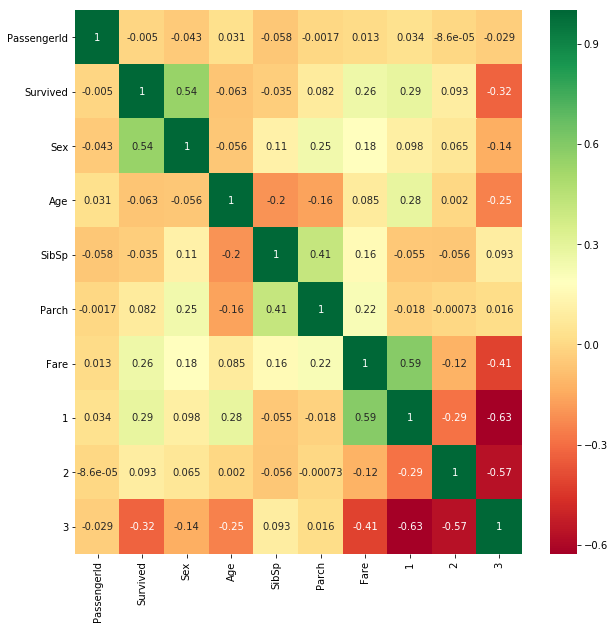

In [36]:
# Trying to do feature selection with Correlation Matrix with HeatMap
corrmat=data_train.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
#plotting the heatmap
g=sns.heatmap(data_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [37]:
print(data_train.head(10))

   PassengerId  Survived  Sex   Age  SibSp  Parch     Fare  1  2  3
0            1         0    0  22.0      1      0   7.2500  0  0  1
1            2         1    1  38.0      1      0  71.2833  1  0  0
2            3         1    1  26.0      0      0   7.9250  0  0  1
3            4         1    1  35.0      1      0  53.1000  1  0  0
4            5         0    0  35.0      0      0   8.0500  0  0  1
5            6         0    0   0.0      0      0   8.4583  0  0  1
6            7         0    0  54.0      0      0  51.8625  1  0  0
7            8         0    0   2.0      3      1  21.0750  0  0  1
8            9         1    1  27.0      0      2  11.1333  0  0  1
9           10         1    1  14.0      1      0  30.0708  0  1  0


In [41]:
#After observing the HEATMAP dropping the features that have very less correlation with the Survived column

data_train=data_train.drop(labels=["SibSp"],axis=1)


KeyError: "['SibSp'] not found in axis"

In [42]:
data_train=data_train.drop(labels=["PassengerId"],axis=1)

In [43]:
print(data_train.head(4))

   Survived  Sex   Age  Parch     Fare  1  2  3
0         0    0  22.0      0   7.2500  0  0  1
1         1    1  38.0      0  71.2833  1  0  0
2         1    1  26.0      0   7.9250  0  0  1
3         1    1  35.0      0  53.1000  1  0  0


In [44]:
Train_features=data_train.iloc[:,2:].values

In [45]:
print(Train_features[4])

[35.    0.    8.05  0.    0.    1.  ]


In [46]:
Train_label=data_train.iloc[:,1:2].values

In [47]:
print(Train_label)

[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]


In [48]:
#One Hot Encoding the labels
from sklearn.preprocessing import OneHotEncoder
oneHot=OneHotEncoder()
oneHot.fit(Train_label) 
Train_Label = oneHot.transform(Train_label).toarray() 

C:\ANACONDA\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [49]:
print(Train_Label)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(Train_features,Train_Label,test_size=0.33)

In [51]:
#Now defining the model
M=X_train.shape[1]
N=X_train.shape[0]

LC=Y_train.shape[1]
print(M,N,LC)

6 596 2


In [58]:
print(Y_train)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [52]:
#Defining the inputs of the Neural Network

X=tf.placeholder(tf.float32,[None,M])
Y=tf.placeholder(tf.float32,[None,LC])
epochs=3000
learning_rate=0.01

In [53]:
#Defining the model 
initializer=tf.contrib.layers.xavier_initializer()#Initializing the weight matrix
h0=tf.layers.dense(X,units=5,activation=tf.nn.relu,kernel_initializer=initializer)
h1=tf.layers.dense(h0,units=LC,activation=tf.nn.sigmoid)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=h1))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

predicted=tf.nn.sigmoid(h1)
correct_pred=tf.equal(tf.round(predicted),Y)
accuracy=tf.reduce_mean(tf.cast(correct_pred,tf.float32))

cost_history = np.empty(shape=[1],dtype=float)

init = tf.initialize_all_variables()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [54]:
#Creating the session

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range (10000):
        loss,_,acc=sess.run([cost ,optimizer , accuracy], feed_dict={X:X_train, Y:Y_train})
        cost_history=np.append(cost_history,acc)
        if epoch%100==0:
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(epoch, loss, acc))
    

Step:     0	Loss: 0.615	Acc: 51.01%
Step:   100	Loss: 0.593	Acc: 50.92%
Step:   200	Loss: 0.589	Acc: 52.01%
Step:   300	Loss: 0.586	Acc: 53.78%
Step:   400	Loss: 0.584	Acc: 56.21%
Step:   500	Loss: 0.582	Acc: 59.90%
Step:   600	Loss: 0.581	Acc: 62.58%
Step:   700	Loss: 0.581	Acc: 64.26%
Step:   800	Loss: 0.580	Acc: 65.27%
Step:   900	Loss: 0.580	Acc: 65.60%
Step:  1000	Loss: 0.579	Acc: 65.94%
Step:  1100	Loss: 0.579	Acc: 66.36%
Step:  1200	Loss: 0.579	Acc: 66.28%
Step:  1300	Loss: 0.579	Acc: 66.78%
Step:  1400	Loss: 0.578	Acc: 66.78%
Step:  1500	Loss: 0.578	Acc: 66.86%
Step:  1600	Loss: 0.578	Acc: 66.69%
Step:  1700	Loss: 0.578	Acc: 66.86%
Step:  1800	Loss: 0.578	Acc: 67.03%
Step:  1900	Loss: 0.577	Acc: 67.11%
Step:  2000	Loss: 0.577	Acc: 67.45%
Step:  2100	Loss: 0.577	Acc: 67.53%
Step:  2200	Loss: 0.577	Acc: 67.53%
Step:  2300	Loss: 0.577	Acc: 67.53%
Step:  2400	Loss: 0.577	Acc: 67.53%
Step:  2500	Loss: 0.577	Acc: 67.62%
Step:  2600	Loss: 0.577	Acc: 67.53%
Step:  2700	Loss: 0.576	Acc: